In [136]:
import pandas as pd
from pandas.io import gbq
import matplotlib.pyplot as plt

In [2]:
df = gbq.read_gbq("SELECT * FROM `bigquery-public-data.nhtsa_traffic_fatalities. accident_2015`",project_id="euphoric-stone-396404")
df.to_csv('Accidentes.csv')

In [23]:
df1 = df.groupby(['state_name','month_of_crash_name','hour_of_crash_name','day_of_week_name'])['state_name'].count()

In [29]:
print(df1['Alabama']['April'])

hour_of_crash_name  day_of_week_name
0:00am-0:59am       Saturday            1
                    Sunday              1
10:00am-10:59am     Monday              1
                    Saturday            1
                    Sunday              1
10:00pm-10:59pm     Thursday            1
                    Wednesday           1
11:00am-11:59am     Friday              2
                    Sunday              1
                    Wednesday           2
11:00pm-11:59pm     Monday              1
                    Saturday            2
                    Thursday            1
12:00pm-12:59pm     Monday              1
                    Saturday            1
1:00pm-1:59pm       Friday              2
                    Saturday            1
                    Thursday            1
                    Wednesday           1
2:00pm-2:59pm       Monday              2
                    Wednesday           1
3:00am-3:59am       Friday              1
                    Sunday             

# Desafio Inicial

Se espera que muestren conocimiento en las siguientes areas:

- Realizar consultas a una base de datos publica alojada en Google Could Plataform
- Trabajar con bases de datos relacionales
- Procesamiento de datos
- Visualización de datos
- Versionado de software

Usando el dataset `nhtsa_traffic_fatalities` desde el proyecto `bigquery-public-data`, y usando la tabla de datos del año 2015. Se pide realizar lo siguiente:

1. Crear y completar un diccionario de datos de la tabla, guardarlo en un archivo de texto separado por comas `.csv` 
Lo siguiente se debe realizar en un jupyter notebook
2. Identificar, usando consultas y con gráficas las siguientes características del dataset: 
   1. Mayor numero de accidentes por estado (`state_name`).
   2. Mayor numero de accidentes por uso de tierra (`land_use`).
   3. Mayor numero de accidentes por empresa de carreteras (`ownership_name`).
   4. Mayor numero de accidentes por carretera (`trafficway_identifier`).
3. Realizar un análisis mensual de accidentes por estado. 
4. Realizar un análisis según la hora del dia. 
   - Ahondar para los estados con mayor cantidad de muertes
5. Finalmente realizar un análisis resaltando la razón entre números de accidentes y conductores ebrios. 

Los resultados deben ser entregados como un repositorio en [github](https://github.com), con una rama de desarrollo  y una de producción, además el repositorio deberá contar con un archivo de requerimientos (requirements.txt) donde se listen las librerías de python relevantes para el desarrollo del análisis y un readme donde se presenten los resultados obtenidos indicando y argumentando todos los descubrimientos que realicen del dataset. 

Para realizar el trabajo en github, les recomiendo la siguiente [guía](https://david-estevez.gitbooks.io/the-git-the-bad-and-the-ugly/content/es/buenas-practicas-al-trabajar-con-git.html), si van a trabajar en grupos, ademas de especificarlo en el readme, cada integrante debe tener su rama de desarrollo y hacer los correspondiente fork y pull request.

In [70]:
Acci = pd.DataFrame(df)

In [171]:
def GRAF_BAR(Acci,Columna):
    Nombres = Acci[Columna].drop_duplicates().values   #Nombres de lo que se agrupa.
    A2 = Acci.groupby([Columna])[Columna].count()
    plt.figure(figsize=(15,6))
    for i in range(len(Nombres)):
        plt.bar(Nombres[i],int(A2[Nombres[i]]))
    plt.xticks(rotation='vertical')
    plt.show()

# 2. Identificar, usando consultas y con gráficas las siguientes características del dataset

A. Mayor numero de accidentes por estado (state_name).

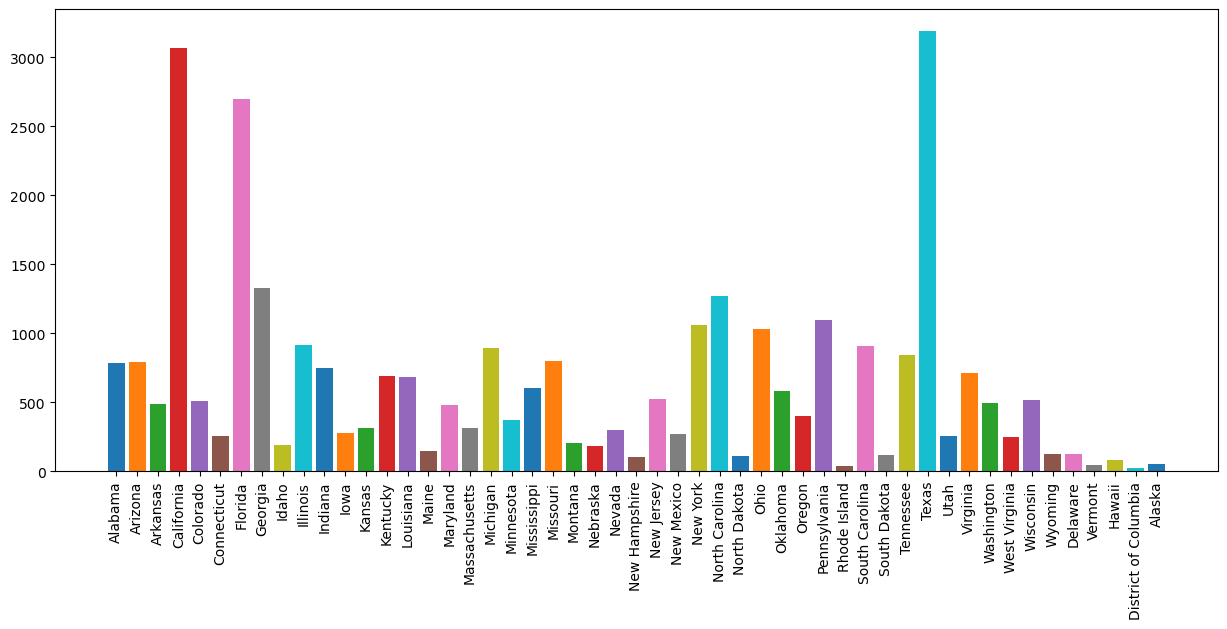

In [169]:
GRAF_BAR(Acci,'state_name')

In [111]:
#Nombres estados
Estados = Acci['state_name'].drop_duplicates().values
print(Estados)

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Florida' 'Georgia' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Delaware' 'Vermont'
 'Hawaii' 'District of Columbia' 'Alaska']


In [128]:
# Agrupar por estado y contar.
A2 = Acci.groupby(['state_name'])['state_name'].count()

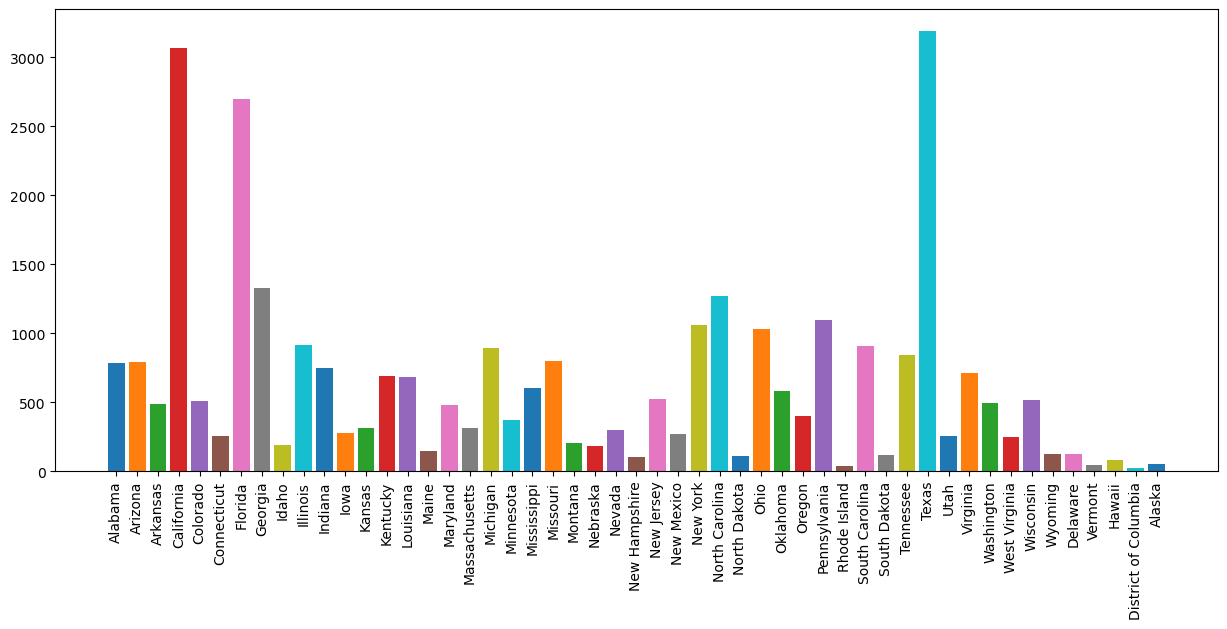

In [167]:
plt.figure(figsize=(15,6))
for i in range(51):
    plt.bar(Estados[i],int(A2[Estados[i]]))
plt.xticks(rotation='vertical')
plt.show()

B. Mayor numero de accidentes por uso de tierra (land_use).

In [173]:
Acci.groupby(['land_use'])['land_use'].count()

land_use
1    15678
2    16429
6      150
8       10
9       20
Name: land_use, dtype: int64

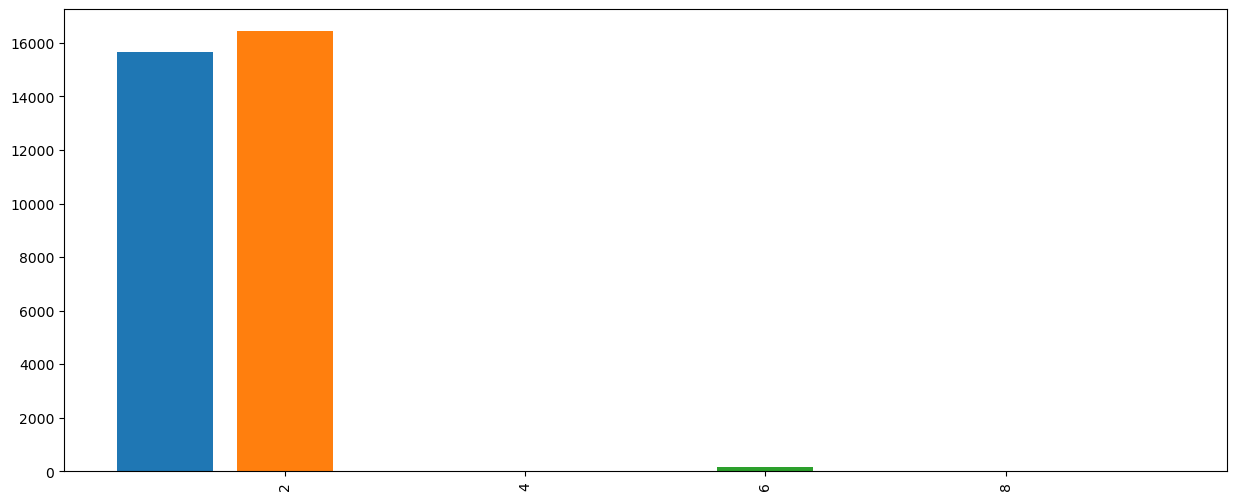

In [172]:
GRAF_BAR(Acci,'land_use')

C. Mayor numero de accidentes por empresa de carreteras (ownership_name).

In [175]:
# Agrupar por estado y contar.
Acci.groupby(['ownership_name'])['ownership_name'].count()

ownership_name
Bureau of Fish and Wildlife                         1
Bureau of Indian Affairs                           30
Bureau of Land Management                           3
City or Municipal Highway Agency                 3368
County Highway Agency                            3243
Indian Tribe Nation                                20
Local Park, Forest or Reservation Agency            1
National Park Service                              15
Navy/Marines                                        1
Not Reported                                     6331
Other Federal Agency                               56
Other Local Agency                                737
Other Public Instrumentality (i.e., Airport)        2
Other State Agency                                 18
Private (other than Railroad)                      18
State Highway Agency                            16022
State Park, Forest, or Reservation Agency          18
State Toll Road                                    80
Town or Towns

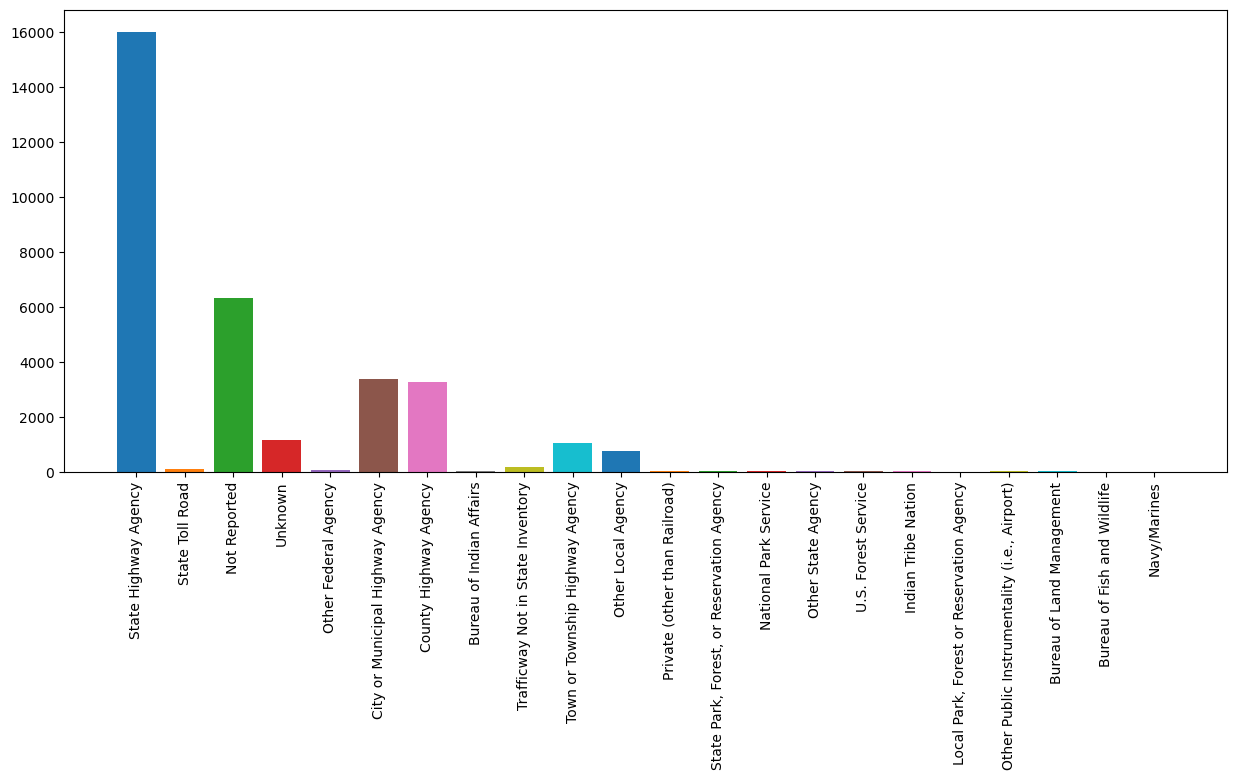

In [176]:
GRAF_BAR(Acci,'ownership_name')

D. Mayor numero de accidentes por carretera (trafficway_identifier).

In [177]:
# Agrupar por carretera y contar.
Acci.groupby(['trafficway_identifier'])['trafficway_identifier'].count()

trafficway_identifier
1-69/US-59 SOUTHWEST FWY    1
1000 W                      1
100TH AVE                   1
100TH ST                    1
101ST AVE NE                1
                           ..
ZIEGLERVILLE RD             1
ZIONSVILLE RD               1
ZOO DRIVE                   1
ZUNI RD                     1
ZUNI RD SE                  2
Name: trafficway_identifier, Length: 15527, dtype: int64

# 4. Realizar un análisis según la hora del dia.
Ahondar para los estados con mayor cantidad de muertes

# 5. Finalmente realizar un análisis resaltando la razón entre números de accidentes y conductores ebrios.

In [4]:
Acci = pd.read_csv('Accidentes.csv')

In [35]:
df2 = Acci.groupby(['land_use'])['land_use'].count()
print(df2)

land_use
1    15678
2    16429
6      150
8       10
9       20
Name: land_use, dtype: int64


In [38]:
df3 = Acci.groupby(['ownership_name'])['ownership_name'].count()
print(df3)

ownership_name
Bureau of Fish and Wildlife                         1
Bureau of Indian Affairs                           30
Bureau of Land Management                           3
City or Municipal Highway Agency                 3368
County Highway Agency                            3243
Indian Tribe Nation                                20
Local Park, Forest or Reservation Agency            1
National Park Service                              15
Navy/Marines                                        1
Not Reported                                     6331
Other Federal Agency                               56
Other Local Agency                                737
Other Public Instrumentality (i.e., Airport)        2
Other State Agency                                 18
Private (other than Railroad)                      18
State Highway Agency                            16022
State Park, Forest, or Reservation Agency          18
State Toll Road                                    80
Town or Towns

In [39]:
df4 = Acci.groupby(['trafficway_identifier'])['trafficway_identifier'].count()
print(df4)

trafficway_identifier
1-69/US-59 SOUTHWEST FWY    1
1000 W                      1
100TH AVE                   1
100TH ST                    1
101ST AVE NE                1
                           ..
ZIEGLERVILLE RD             1
ZIONSVILLE RD               1
ZOO DRIVE                   1
ZUNI RD                     1
ZUNI RD SE                  2
Name: trafficway_identifier, Length: 15527, dtype: int64


In [47]:
df5

month_of_crash_name
April        2419
August       3034
December     2826
February     1971
January      2353
July         2995
June         2763
March        2385
May          2851
November     2758
October      3049
September    2883
Name: month_of_crash_name, dtype: int64

In [46]:
df5 = Acci.groupby(['month_of_crash_name'])['month_of_crash_name'].count()

In [48]:
df6 = Acci.groupby(['hour_of_crash', 'hour_of_crash_name'])['hour_of_crash'].count()
df6

hour_of_crash  hour_of_crash_name
0              0:00am-0:59am         1266
1              1:00am-1:59am         1227
2              2:00am-2:59am         1207
3              3:00am-3:59am          946
4              4:00am-4:59am          751
5              5:00am-5:59am         1000
6              6:00am-6:59am         1202
7              7:00am-7:59am         1144
8              8:00am-8:59am          910
9              9:00am-9:59am          959
10             10:00am-10:59am       1020
11             11:00am-11:59am       1126
12             12:00pm-12:59pm       1222
13             1:00pm-1:59pm         1386
14             2:00pm-2:59pm         1513
15             3:00pm-3:59pm         1684
16             4:00pm-4:59pm         1650
17             5:00pm-5:59pm         1837
18             6:00pm-6:59pm         1894
19             7:00pm-7:59pm         1782
20             8:00pm-8:59pm         1861
21             9:00pm-9:59pm         1810
22             10:00pm-10:59pm       1555


In [57]:
df7 =Acci.groupby(['state_name', 'month_of_crash_name'])['state_name'].count()
print(df7)

state_name  month_of_crash_name
Alabama     April                  69
            August                 75
            December               71
            February               37
            January                50
                                   ..
Wyoming     March                   6
            May                    12
            November               11
            October                 9
            September               8
Name: state_name, Length: 608, dtype: int64


In [60]:
df7['Alabama']

month_of_crash_name
April        69
August       75
December     71
February     37
January      50
July         73
June         61
March        58
May          72
November     62
October      82
September    72
Name: state_name, dtype: int64

In [44]:
Acci.columns

Index(['state_number', 'state_name', 'consecutive_number',
       'number_of_vehicle_forms_submitted_all',
       'number_of_motor_vehicles_in_transport_mvit',
       'number_of_parked_working_vehicles',
       'number_of_forms_submitted_for_persons_not_in_motor_vehicles',
       'number_of_forms_submitted_for_persons_in_motor_vehicles',
       'number_of_persons_in_motor_vehicles_in_transport_mvit',
       'number_of_persons_not_in_motor_vehicles_in_transport_mvit', 'county',
       'city', 'day_of_crash', 'day_name', 'month_of_crash',
       'month_of_crash_name', 'year_of_crash', 'day_of_week',
       'day_of_week_name', 'hour_of_crash', 'hour_of_crash_name',
       'minute_of_crash', 'minute_of_crash_name', 'national_highway_system',
       'national_highway_system_name', 'route_signing', 'route_signing_name',
       'trafficway_identifier', 'trafficway_identifier_2', 'land_use',
       'land_use_name', 'functional_system', 'functional_system_name',
       'ownership', 'ownership_n